# Training Neural Networks with Keras

### Goals: 
- Intro: train a neural network with `tensorflow` and the Keras layers

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

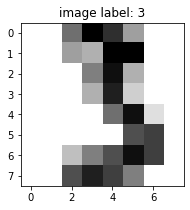

In [7]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

## Train / Test Split

Let's keep some held-out data to be able to measure the generalization performance of our model.

In [8]:
from sklearn.model_selection import train_test_split


data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

In [9]:
X_train.shape

(1527, 64)

In [10]:
X_test.shape

(270, 64)

In [11]:
y_train.shape

(1527,)

In [12]:
y_test.shape

(270,)

## Preprocessing of the Input Data


Make sure that all input variables are approximately on the same scale via input normalization:

In [13]:
from sklearn import preprocessing


# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

In [14]:
X_train.shape

(1527, 64)

In [15]:
X_train.mean(axis=0)

array([ 0.00000000e+00,  1.82717315e-07,  1.44815475e-08, -3.13441575e-08,
       -7.49449391e-09, -9.50473567e-09, -7.10805850e-08,  6.18783673e-08,
       -3.06025143e-08,  1.31056055e-07,  3.27103429e-08, -3.59111163e-09,
       -4.29372049e-09, -1.07733342e-08, -1.92827070e-08, -7.90239696e-08,
        1.56408518e-07, -2.18589391e-09,  2.89630950e-08, -1.74090840e-08,
        6.71381741e-08,  5.87068669e-08, -9.85213617e-08, -4.79598782e-07,
       -2.98413561e-08, -4.19223234e-08, -1.82522143e-07,  1.79555570e-08,
       -3.11294706e-08,  2.08440607e-08, -6.83091841e-08,  9.33420665e-07,
        0.00000000e+00,  1.78774897e-08,  1.50670544e-07, -3.45839659e-08,
       -1.02463780e-08, -3.66137236e-08, -5.67551766e-08,  0.00000000e+00,
       -2.17120757e-07, -6.30981702e-08, -1.81116935e-08, -2.62307278e-08,
       -7.95509294e-08, -1.95169103e-09, -8.23613622e-09,  4.77871538e-08,
       -1.66303593e-07, -1.25688899e-07, -2.30299548e-08, -1.13198082e-08,
        2.51387576e-07, -

In [16]:
X_train.std(axis=0)

array([0.        , 0.99999774, 0.9999994 , 1.0000005 , 0.9999989 ,
       0.9999988 , 1.0000077 , 0.9999965 , 1.0000098 , 0.9999947 ,
       1.0000007 , 0.9999992 , 0.9999999 , 0.99999684, 0.9999984 ,
       0.99999887, 0.9999969 , 1.000001  , 1.0000002 , 1.0000025 ,
       0.99999905, 1.000004  , 1.0000008 , 0.9999972 , 0.9999967 ,
       0.99999726, 1.        , 1.0000007 , 1.0000029 , 0.9999996 ,
       0.99999696, 1.0000001 , 0.        , 1.0000007 , 1.0000023 ,
       0.9999993 , 0.9999994 , 0.9999997 , 0.9999955 , 0.        ,
       0.9999891 , 0.99999785, 1.0000032 , 0.9999999 , 0.99999756,
       1.000001  , 0.999996  , 0.9999987 , 1.0000006 , 0.9999936 ,
       1.0000038 , 1.0000004 , 1.0000012 , 0.999997  , 0.99999785,
       0.9999988 , 0.9999857 , 1.0000073 , 0.9999967 , 1.0000031 ,
       0.9999993 , 1.        , 0.999996  , 0.9999977 ], dtype=float32)

Let's display the one of the transformed sample (after feature standardization):

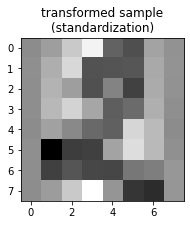

In [17]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

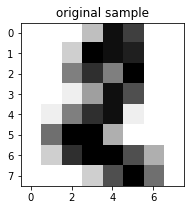

In [18]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index:sample_index+1]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [19]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [20]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


## Preprocessing of the Target Data


To train a first neural network we also need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [21]:
y_train[:3]

array([2, 9, 5])

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [25]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, dtype=int)
y_train[:3], Y_train[:3]

(array([2, 9, 5]),
 array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]))

In [23]:
Y_train.shape

(1527, 10)

## Feed Forward Neural Networks with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://www.tensorflow.org/guide/keras/overview
- Experiment with different optimizers, activations, size of layers, initializations

### A First Keras Model

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

input_dim = X_train.shape[1]
hidden_dim = 100
output_dim = Y_train.shape[1]

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
39/39 [==============================] - 3s 14ms/step - loss: 0.9672 - accuracy: 0.7289 - val_loss: 0.4413 - val_accuracy: 0.8922
Epoch 2/15
39/39 [==============================] - 0s 5ms/step - loss: 0.3389 - accuracy: 0.9304 - val_loss: 0.2906 - val_accuracy: 0.9248
Epoch 3/15
39/39 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.9607 - val_loss: 0.2306 - val_accuracy: 0.9412
Epoch 4/15
39/39 [==============================] - 0s 5ms/step - loss: 0.1767 - accuracy: 0.9648 - val_loss: 0.2003 - val_accuracy: 0.9542
Epoch 5/15
39/39 [==============================] - 0s 5ms/step - loss: 0.1463 - accuracy: 0.9705 - val_loss: 0.1795 - val_accuracy: 0.9608
Epoch 6/15
39/39 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9787 - val_loss: 0.1647 - val_accuracy: 0.9641
Epoch 7/15
39/39 [==============================] - 0s 5ms/step - loss: 0.1087 - accuracy: 0.9795 - val_loss: 0.1560 - val_accuracy: 0.9575
Epoch 8/15
39/39 [=

### Visualizing the Convergence

Let's wrap the keras history info into a pandas dataframe for easier plotting:

In [29]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.967163,0.728911,0.441318,0.892157,0
1,0.338851,0.930385,0.290563,0.924837,1
2,0.228772,0.960688,0.230609,0.941176,2
3,0.176700,0.964783,0.200307,0.954248,3
4,0.146325,0.970516,0.179517,0.960784,4
5,0.125061,0.978706,0.164727,0.964052,5
6,0.108690,0.979525,0.155958,0.957516,6
7,0.097068,0.984439,0.147482,0.964052,7
8,0.086548,0.986896,0.141357,0.964052,8
9,0.078594,0.987715,0.135780,0.964052,9


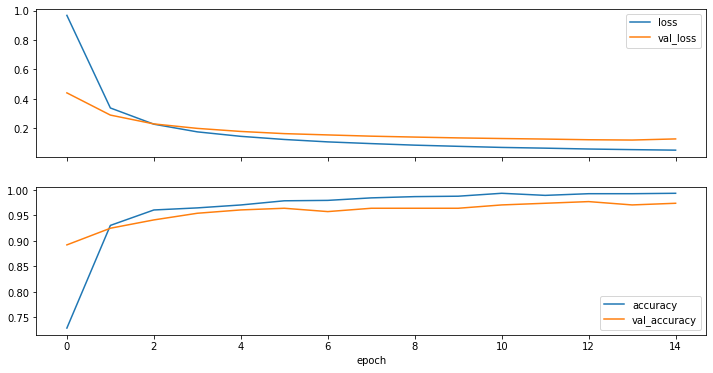

In [49]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)  # , kind='barh')
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

The loss of the validation set is less than that of the train set at the beginning...

HOW COME IS HIS COUTER-INTUITIVENESS?
- because keras does a moving average instead of averaging at the end, unlike in validation which is done once every end-of-epoch
- this is called average SMOOTHING

### Monitoring Convergence with Tensorboard

Tensorboard is a built-in neural network monitoring tool. 

In [50]:
%load_ext tensorboard

In [ ]:
!rm -rf tensorboard_logs

In [51]:
import datetime
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model.add(Dense(output_dim, activation="softmax"))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

timestamp =  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "tensorboard_logs/" + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, y=Y_train, validation_split=0.2, epochs=15,
          callbacks=[tensorboard_callback]);

Epoch 1/15
39/39 [==============================] - 1s 25ms/step - loss: 0.9484 - accuracy: 0.7453 - val_loss: 0.4430 - val_accuracy: 0.8987
Epoch 2/15
39/39 [==============================] - 0s 7ms/step - loss: 0.3376 - accuracy: 0.9328 - val_loss: 0.2941 - val_accuracy: 0.9150
Epoch 3/15
39/39 [==============================] - 0s 7ms/step - loss: 0.2341 - accuracy: 0.9517 - val_loss: 0.2442 - val_accuracy: 0.9314
Epoch 4/15
39/39 [==============================] - 0s 7ms/step - loss: 0.1835 - accuracy: 0.9607 - val_loss: 0.2007 - val_accuracy: 0.9412
Epoch 5/15
39/39 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9689 - val_loss: 0.1861 - val_accuracy: 0.9510
Epoch 6/15
39/39 [==============================] - 0s 7ms/step - loss: 0.1300 - accuracy: 0.9746 - val_loss: 0.1615 - val_accuracy: 0.9575
Epoch 7/15
39/39 [==============================] - 0s 7ms/step - loss: 0.1139 - accuracy: 0.9762 - val_loss: 0.1514 - val_accuracy: 0.9641
Epoch 8/15
39/39 [=

In [52]:
%tensorboard --logdir tensorboard_logs

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
**Notes**: 

The keras API documentation is available at:

https://www.tensorflow.org/api_docs/python/tf/keras

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

It is also possible to type the beginning of a function call / constructor and type "shift-tab" after the opening paren:

```python
optimizers.SGD(<shiff-tab>
```

In [ ]:
optimizers.SGD?

Epoch 1/15
39/39 [==============================] - 1s 11ms/step - loss: 1.1998 - accuracy: 0.6413 - val_loss: 0.4500 - val_accuracy: 0.8954
Epoch 2/15
39/39 [==============================] - 0s 6ms/step - loss: 0.3246 - accuracy: 0.9230 - val_loss: 0.2856 - val_accuracy: 0.9248
Epoch 3/15
39/39 [==============================] - 0s 6ms/step - loss: 0.2152 - accuracy: 0.9607 - val_loss: 0.2287 - val_accuracy: 0.9314
Epoch 4/15
39/39 [==============================] - 0s 6ms/step - loss: 0.1688 - accuracy: 0.9697 - val_loss: 0.1949 - val_accuracy: 0.9542
Epoch 5/15
39/39 [==============================] - 0s 6ms/step - loss: 0.1407 - accuracy: 0.9746 - val_loss: 0.1700 - val_accuracy: 0.9641
Epoch 6/15
39/39 [==============================] - 0s 5ms/step - loss: 0.1210 - accuracy: 0.9828 - val_loss: 0.1582 - val_accuracy: 0.9641
Epoch 7/15
39/39 [==============================] - 0s 6ms/step - loss: 0.1065 - accuracy: 0.9836 - val_loss: 0.1453 - val_accuracy: 0.9706
Epoch 8/15
39/39 [=

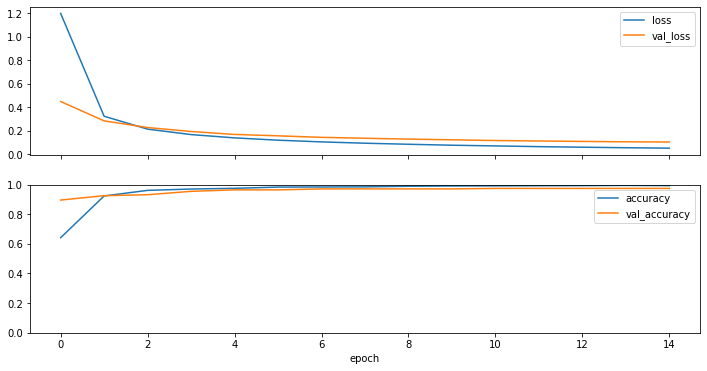

In [62]:
### decreasing the learning_rate

model_lowLR = Sequential()
model_lowLR.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model_lowLR.add(Dense(output_dim, activation="softmax"))

model_lowLR.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])

history_lowLR = model_lowLR.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32)

history_lowLR_df = pd.DataFrame(history_lowLR.history)
history_lowLR_df["epoch"] = history_lowLR.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_lowLR_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)  # , kind='barh')
history_lowLR_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, ylim=(0,1));

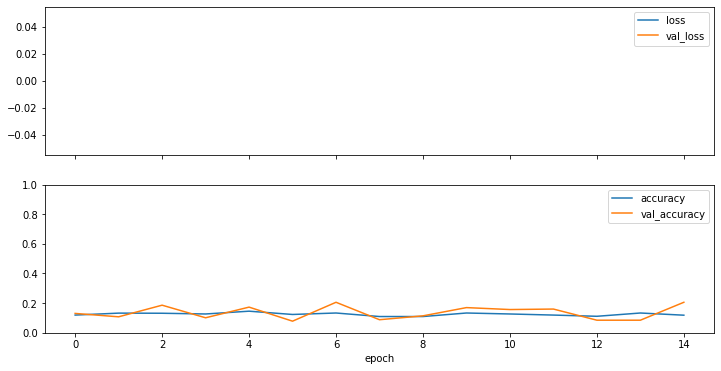

In [77]:
### increasing the learning rate (DIVERGING)

model_highLR = Sequential()
model_highLR.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh"))
model_highLR.add(Dense(output_dim, activation="softmax"))

model_highLR.compile(optimizer=optimizers.SGD(learning_rate=1e35),
              loss='categorical_crossentropy', metrics=['accuracy'])

history_highLR = model_highLR.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32//32, verbose=0)

history_highLR_df = pd.DataFrame(history_highLR.history)
history_highLR_df["epoch"] = history_highLR.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_highLR_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)  # , kind='barh')
history_highLR_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, ylim=(0,1));

In [ ]:
# %load solutions/keras_sgd_and_momentum.py

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

  Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

Epoch 1/15
39/39 [==============================] - 1s 18ms/step - loss: 0.5119 - accuracy: 0.8583 - val_loss: 0.2041 - val_accuracy: 0.9542
Epoch 2/15
39/39 [==============================] - 0s 12ms/step - loss: 0.1386 - accuracy: 0.9623 - val_loss: 0.1519 - val_accuracy: 0.9739
Epoch 3/15
39/39 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.9853 - val_loss: 0.1807 - val_accuracy: 0.9673
Epoch 4/15
39/39 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9926 - val_loss: 0.1897 - val_accuracy: 0.9641
Epoch 5/15
39/39 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.1225 - val_accuracy: 0.9804
Epoch 6/15
39/39 [==============================] - 0s 12ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.1199 - val_accuracy: 0.9804
Epoch 7/15
39/39 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1611 - val_accuracy: 0.9771
Epoch 8/15
39

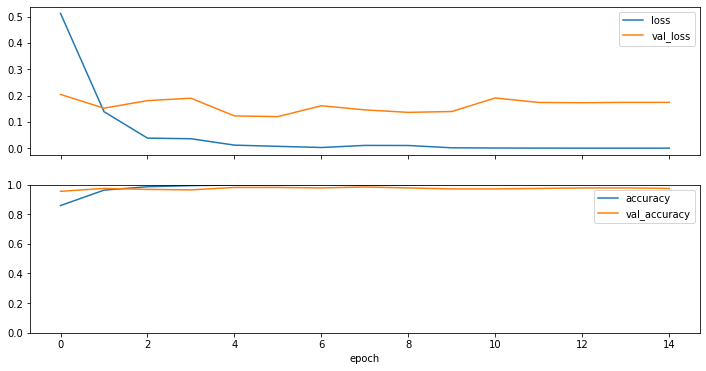

In [90]:
### change optimizer

hidden_dim = 1000
model_adam = Sequential()
model_adam.add(Dense(hidden_dim, input_dim=input_dim, activation="relu"))
model_adam.add(Dense(hidden_dim, activation="relu"))
model_adam.add(Dense(hidden_dim, activation="relu"))
model_adam.add(Dense(output_dim, activation="softmax"))

model_adam.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(X_train, Y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=1)

history_adam_df = pd.DataFrame(history_adam.history)
history_adam_df["epoch"] = history_adam.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_adam_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)  # , kind='barh')
history_adam_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, ylim=(0,1));

In [91]:
history_adam_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.511935,0.858313,0.204128,0.954248,0
1,0.138643,0.962326,0.151900,0.973856,1
2,0.038155,0.985258,0.180660,0.967320,2
3,0.035852,0.992629,0.189703,0.964052,3
4,0.011535,0.996724,0.122462,0.980392,4
5,0.006981,0.997543,0.119925,0.980392,5
6,0.002553,0.999181,0.161120,0.977124,6
7,0.010484,0.996724,0.145474,0.983660,7
8,0.010140,0.997543,0.135951,0.977124,8
9,0.001445,1.000000,0.139319,0.970588,9


In [ ]:
# %load solutions/keras_adam.py

### Exercises: Forward Pass and Generalization

- Compute predictions on test set using `model.predict(...)`
- Compute average accuracy of the model on the test set: the fraction of test samples for which the model makes a prediction that matches the true label.

In [108]:
preds = model_adam.predict(X_test)
Y_predict = to_categorical(np.argmax(preds, axis=1))
Y_test = to_categorical(y_test)

np.mean(Y_predict==Y_test)

0.9955555555555555

In [ ]:
# %load solutions/keras_accuracy_on_test_set.py

Let us decompose how we got the predictions. First, we call the model on the data to get the laster layer (softmax) outputs directly as a tensorflow Tensor:

In [111]:
predictions_tf = model(X_test)
predictions_tf[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.8318601e-07, 2.5931071e-04, 9.9917525e-01, 4.5439691e-04,
        2.4885338e-07, 4.8493337e-07, 2.2353379e-06, 5.1516534e-05,
        4.1031533e-05, 1.4679523e-05],
       [5.9145233e-03, 1.9893272e-05, 1.5648782e-05, 2.2055433e-08,
        9.9261594e-01, 3.1341533e-06, 1.2078555e-03, 2.2029181e-04,
        2.0942173e-06, 7.0905429e-07],
       [1.3657034e-05, 9.3046110e-05, 1.2635373e-04, 3.6086803e-04,
        1.5167118e-04, 2.0426207e-05, 8.5903196e-07, 9.9884570e-01,
        6.2454051e-06, 3.8120057e-04],
       [5.6270778e-04, 3.1228992e-03, 2.6060236e-04, 8.3508110e-03,
        4.9652142e-05, 2.8563925e-04, 9.5087489e-06, 8.4520841e-05,
        1.8783089e-03, 9.8539531e-01],
       [4.1619860e-06, 9.6735919e-01, 2.4387942e-04, 9.6764369e-04,
        6.8446255e-04, 1.0213563e-05, 2.6028965e-05, 9.5018483e-04,
        2.8085895e-02, 1.6683666e-03]], dtype=float32)>

In [112]:
type(predictions_tf), predictions_tf.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([270, 10]))

We can use the tensorflow API to check that for each row, the probabilities sum to 1:

In [113]:
import tensorflow as tf

tf.reduce_sum(predictions_tf, axis=1)[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.        , 1.0000001 , 0.99999994, 1.        , 1.        ],
      dtype=float32)>

In [157]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

We can also extract the label with the highest probability using the tensorflow API:

In [114]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 7, 9, 1], dtype=int64)>

We can compare those labels to the expected labels to compute the accuracy with the Tensorflow API. Note however that we need an explicit cast from boolean to floating point values to be able to compute the mean accuracy when using the tensorflow tensors:

In [115]:
accuracy_tf = tf.reduce_mean(tf.cast(predicted_labels_tf == y_test, tf.float64))
accuracy_tf

<tf.Tensor: shape=(), dtype=float64, numpy=0.9740740740740741>

Also note that it is possible to convert tensors to numpy array if one prefer to use numpy:

In [116]:
accuracy_tf.numpy()

0.9740740740740741

In [117]:
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 7, 9, 1], dtype=int64)>

In [118]:
predicted_labels_tf.numpy()[:5]

array([2, 4, 7, 9, 1], dtype=int64)

In [119]:
(predicted_labels_tf.numpy() == y_test).mean()

0.9740740740740741

## Home Assignment: Impact of Initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default, Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [139]:
from tensorflow.keras import initializers

normal_init = initializers.TruncatedNormal(stddev=0.01)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [140]:
model.layers

Let's have a look at the parameters of the first layer after initialization but before any training has happened:

In [141]:
model.layers[0].weights

[<tf.Variable 'dense_86/kernel:0' shape=(64, 1000) dtype=float32, numpy=
 array([[-1.51397579e-03, -9.54735186e-03,  3.67057254e-03, ...,
         -9.78895370e-03, -9.62955598e-03,  3.11052287e-03],
        [ 1.12249870e-02,  1.71565246e-02,  1.10497922e-02, ...,
          9.83377686e-04,  1.46274623e-02,  4.57806978e-03],
        [-1.15553960e-02,  1.56625155e-02,  1.44276174e-03, ...,
         -2.99982331e-03,  7.51114171e-03,  8.95472767e-05],
        ...,
        [-3.74185247e-03, -7.56658753e-03, -9.14073177e-03, ...,
          6.46110508e-04, -1.27389352e-03,  2.22618645e-03],
        [-1.32936835e-02, -7.78082758e-04,  5.78953605e-03, ...,
          1.13424705e-03,  1.56359356e-02, -9.04264953e-03],
        [-1.00171715e-02,  6.75780000e-03,  1.36589212e-03, ...,
         -1.31738735e-02,  1.35586075e-02,  3.39187356e-03]], dtype=float32)>,
 <tf.Variable 'dense_86/bias:0' shape=(1000,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [142]:
w = model.layers[0].weights[0].numpy()
w

array([[-1.51397579e-03, -9.54735186e-03,  3.67057254e-03, ...,
        -9.78895370e-03, -9.62955598e-03,  3.11052287e-03],
       [ 1.12249870e-02,  1.71565246e-02,  1.10497922e-02, ...,
         9.83377686e-04,  1.46274623e-02,  4.57806978e-03],
       [-1.15553960e-02,  1.56625155e-02,  1.44276174e-03, ...,
        -2.99982331e-03,  7.51114171e-03,  8.95472767e-05],
       ...,
       [-3.74185247e-03, -7.56658753e-03, -9.14073177e-03, ...,
         6.46110508e-04, -1.27389352e-03,  2.22618645e-03],
       [-1.32936835e-02, -7.78082758e-04,  5.78953605e-03, ...,
         1.13424705e-03,  1.56359356e-02, -9.04264953e-03],
       [-1.00171715e-02,  6.75780000e-03,  1.36589212e-03, ...,
        -1.31738735e-02,  1.35586075e-02,  3.39187356e-03]], dtype=float32)

In [143]:
w.std()

0.008799155

In [144]:
b = model.layers[0].weights[1].numpy()
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Epoch 1/15
48/48 [==============================] - 2s 12ms/step - loss: 2.1419 - accuracy: 0.5160
Epoch 2/15
48/48 [==============================] - 1s 11ms/step - loss: 1.0154 - accuracy: 0.7289
Epoch 3/15
48/48 [==============================] - 0s 10ms/step - loss: 0.4446 - accuracy: 0.8847
Epoch 4/15
48/48 [==============================] - 0s 10ms/step - loss: 0.2538 - accuracy: 0.9312 0s - loss: 0.2822 - accura
Epoch 5/15
48/48 [==============================] - 0s 9ms/step - loss: 0.1736 - accuracy: 0.9587
Epoch 6/15
48/48 [==============================] - 0s 9ms/step - loss: 0.1364 - accuracy: 0.9659
Epoch 7/15
48/48 [==============================] - 0s 9ms/step - loss: 0.1152 - accuracy: 0.9725
Epoch 8/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0990 - accuracy: 0.9745
Epoch 9/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0871 - accuracy: 0.9810
Epoch 10/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0788 - accur

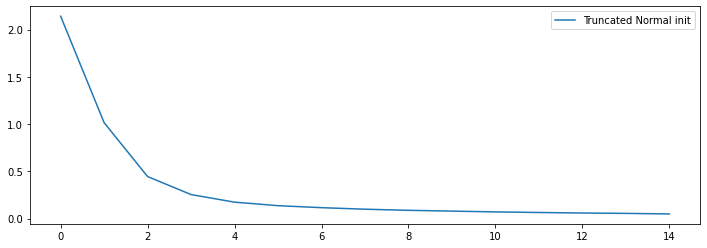

In [145]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=32)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

Once the model has been fit, the weights have been updated and notably the biases are no longer 0:

In [127]:
model.layers[0].weights

[<tf.Variable 'dense_83/kernel:0' shape=(64, 1000) dtype=float32, numpy=
 array([[ 0.00695878, -0.01530592,  0.01711873, ...,  0.01717676,
          0.00430252, -0.00624382],
        [ 0.01610993, -0.00215161,  0.02523053, ..., -0.01658724,
         -0.02120814,  0.00156985],
        [ 0.01547192,  0.00444596, -0.01080515, ..., -0.01951333,
         -0.02035991, -0.01111064],
        ...,
        [ 0.01870426,  0.00357882,  0.00885614, ..., -0.00711915,
         -0.0261149 , -0.00164677],
        [ 0.02108141, -0.01684397, -0.00733969, ..., -0.02219195,
         -0.0079047 , -0.02977075],
        [ 0.01806872, -0.01028818,  0.0094494 , ..., -0.00929769,
         -0.01983588,  0.00173853]], dtype=float32)>,
 <tf.Variable 'dense_83/bias:0' shape=(1000,) dtype=float32, numpy=
 array([ 1.88959241e-02, -7.53269624e-03,  4.86771110e-04,  1.07188560e-02,
         6.83516031e-03, -1.03159780e-02, -1.35068421e-03,  1.62212308e-02,
        -1.37192651e-03,  8.59634194e-04,  1.21452529e-02, -3.83

#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `stddev=1e-3`
  - a larger scale e.g. `stddev=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are more advanced solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

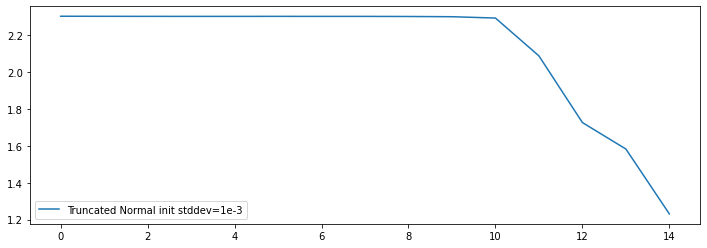

In [163]:
### very small initialization:

normal_init = initializers.TruncatedNormal(stddev=1e-3)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy')  # , metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=0)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init stddev=1e-3")
plt.legend();

It took the model 15 epochs to just reach a loss of 1.4, whereas with stddev init of 1e-2 it needed 1 epoch to reach a loss of 1.

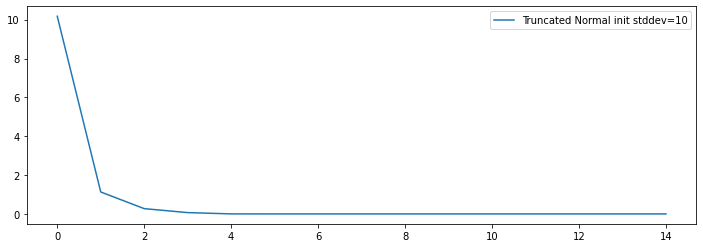

In [161]:
### big initialization:

normal_init = initializers.TruncatedNormal(stddev=1)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=0)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init stddev=10")
plt.legend();

Here also, we got a very bad performance, the weights are already large and we need more time to reduce them.

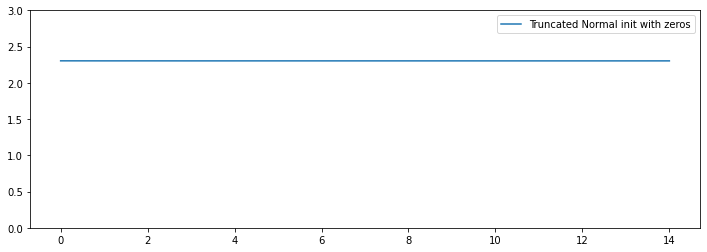

In [153]:
### very small initialization:

normal_init = initializers.TruncatedNormal(stddev=0)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=0)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init with zeros")
plt.ylim(0,3)
plt.legend();

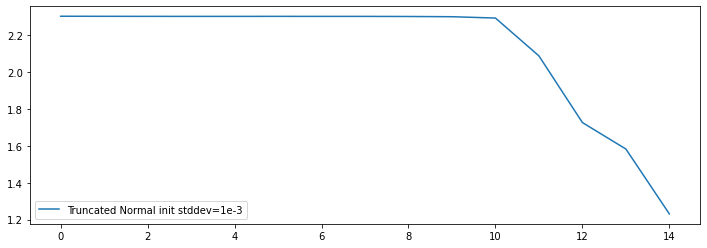

In [163]:
### very small initialization:

normal_init = initializers.TruncatedNormal(stddev=1e-3)


model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy')  # , metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=15, batch_size=32, verbose=0)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init stddev=1e-3")
plt.legend();

Fitting with: SGD
Fitting with: Adam
Fitting with: SGD + Nesterov momentum


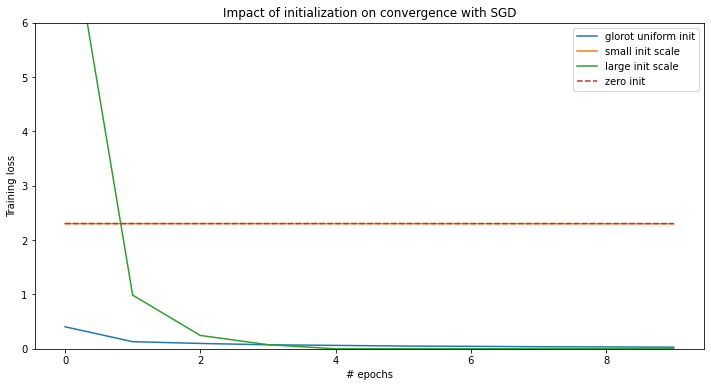

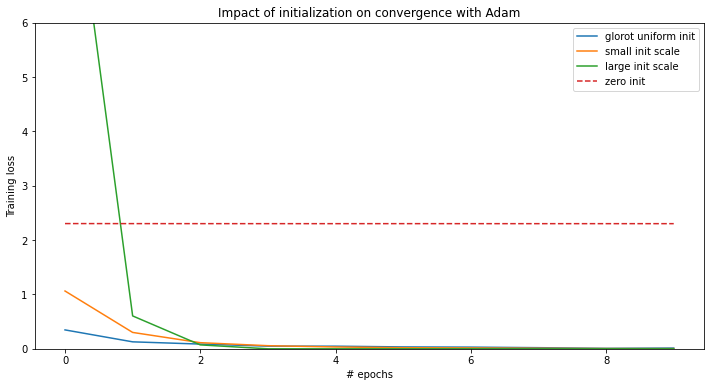

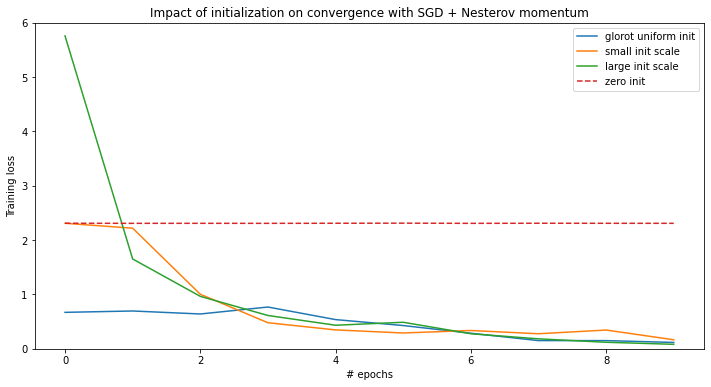

In [168]:
# %load solutions/keras_initializations.py
large_scale_init = initializers.TruncatedNormal(stddev=1)
small_scale_init = initializers.TruncatedNormal(stddev=1e-3)


optimizer_list = [
    ('SGD', optimizers.SGD(learning_rate=0.1)),
    ('Adam', optimizers.Adam()),
    ('SGD + Nesterov momentum', optimizers.SGD(
            learning_rate=0.1, momentum=0.9, nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    print("Fitting with:", optimizer_name)
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                        kernel_initializer=init))
        model.add(Dense(hidden_dim, activation="tanh",
                        kernel_initializer=init))
        model.add(Dense(output_dim, activation="softmax",
                        kernel_initializer=init))

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train, Y_train,
                            epochs=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)


In [166]:
# %load solutions/keras_initializations_analysis.py
# Analysis
#
# If the network is initialized to zero weights, the activations of the hidden
# layers are always set to zero, whatever the value of the inputs. The gradient
# is always zero for all training samples and no learning can happen with any
# gradient-based optimizer (SGD, Adam...): the loss stays constant.
#
# A network with null weights has null gradients but this not a local minimum
# (nor a local maximum): it is a saddle point at the center of a neighborhood
# with very low gradients.
#
# This phenomenon only exists because of the presence of one or more hidden
# layers: a logistic regression model (just a single Dense layer with softmax
# activations) can bit fit with SGD from 0 initialized weights without any
# problem.
#
# For neural nets when the scale of a random initializations of the weights is
# too small, SGD has a hard time evading that area of low gradients. Adding
# momentum can help but especially for deep networks it can take many epochs to
# evade the area.
#
# Initializing the weights with large random values will make the output
# distribution (softmax) very peaky: the network is very "confident" of its
# predictions even if they are completely random. This leads to a very high
# initial loss value.
#
# The softmax function does not saturate (bad classification always have a
# non-zero gradient). However the intermediate tanh layers can saturate,
# therefore squashing the gradient of the loss with respect to the parameters
# of the first "Dense" layer and making the network train much slower.
#
# The Glorot uniform init uses a scale that depends on the dimensions of the
# weight matrix so has to preserve the average norm of activations and flowing
# gradients so as to make learning possible. Keras provides alternatives that
# can be better in some cases. Please refer to the references in the Keras
# documentation to learn more on the theoretical justifications behind those
# schemes.
#
# Adam tends to be more robust when it comes to bad initialization thanks to
# its per-weight learning rate adjustments but still benefits from a good
# initialization.
#
# More on this in a later class on optimization issues. For now  just remember
# that if you network fails to learn at all (the loss stays at its initial
# value):
#
# - ensure that the weights are properly initialized,
# - inspect the per-layer gradient norms to help identify the bad layer,
# - use Adam instead of SGD as your default go-to initializer.
#
# https://stackoverflow.com/questions/50033312/how-to-monitor-gradient-vanish-and-explosion-in-keras-with-tensorboard
